<a href="https://colab.research.google.com/github/21Ovi/Heart-Disease-Classification/blob/main/Heart_Diesease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING HEART DISEASE**


Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.
Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

 
**OVERVIEW :**

* Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.

* In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease.

* 	About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths, according to their website.

* Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.

* Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.

* Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.

* Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. 

* For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.

**PROBLEM DESCRIPTION**
 
To predict the heart_disease_present(binary class), which represents whether patient has heart disease or not.

**FEATURES**
* **heart_disease_present** - patient with heart disease
 * Type - Binary
   * 0 - no heart disease present
   * 1 - heart disease present

There are 14 columns in the dataset, 

* **patient_id column** - unique and random identifier

The remaining 13 features are described in the section below,

*	**slope_of_peak_exercise_st_segment** - quality of blood flow to the heart

* **thal** - Thallium stress test measuring blood flow to the heart
 * Type - categorical
   * normal
   * fixed_effect
   *  reversible_effect

*	**resting_blood_pressure** - resting blood pressure
 * Type - Integer

* **chest_pain_type** - chest pain type (4 values)
 * Type - Interger
     * 1
     * 2
     * 3
     * 4


* **num_major_vessels** - number of major vessels (0-3) colored by flourosopy
 * Type - Interger
   * 0 - Arota 
   * 1 - vena cava
   * 2 - pulmonary artery 
   * 3 - pulmonary vien 

* **fasting_blood_sugar_gt_120_mg_per_dl** - fasting blood sugar > 120 mg/dl
 * Type - Binary
   * 0 - blood sugar range that will not affect heart (< 120 mg/dl)
   * 1 - blood sugar range that will affect heart (> 120 mg/dl)

* **resting_ekg_results** - resting electrocardiographic results
  * Type - Integer
    * 0 - normal
    * 1 - has ST-T (preclinical cardiac involement)
    * 2 - hypertrophy (maximum heart rate) 

* **serum_cholesterol_mg_per_dl** - serum cholestoral in mg/dl
  * Type - Integer


* **oldpeak_eq_st_depression** - oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
 * Type - Float

* **sex** 
 * Type - binary
   * 0 - female
   * 1 - male

* **age** - Age in years
 
  * Type - Integer

* **max_heart_rate_achieved** -  maximum heart rate achieved 
 * Type - Integer (Beats per minute)

* **exercise_induced_angina** - pain in the chest that comes on with exercise, stress, or other things that make the heart work harder. 
 *  Type- Binary
       
       * 0 - No chest pain

       * 1 - chest pain
 

**PREPARING THE TOOLS**

In [ ]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots to appear inside the notebook 
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# To ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
X = pd.read_csv("https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/PRCP-1016-HeartDieseasePred/Data/values.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/PRCP-1016-HeartDieseasePred/Data/labels.csv")

In [ ]:
X.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [ ]:
Y.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [ ]:
X.head().T

,0,1,2,3,4
patient_id,0z64un,ryoo3j,yt1s1x,l2xjde,oyt4ek
slope_of_peak_exercise_st_segment,1,2,1,1,3
thal,normal,normal,normal,reversible_defect,reversible_defect
resting_blood_pressure,128,110,125,152,178
chest_pain_type,2,3,4,4,1
num_major_vessels,0,0,3,0,0
fasting_blood_sugar_gt_120_mg_per_dl,0,0,0,0,0
resting_ekg_results,2,0,2,0,2
serum_cholesterol_mg_per_dl,308,214,304,223,270
oldpeak_eq_st_depression,0.0,1.6,0.0,0.0,4.2


In [ ]:
Y.head().T

,0,1,2,3,4
patient_id,0z64un,ryoo3j,yt1s1x,l2xjde,oyt4ek
heart_disease_present,0,0,1,1,0


# **BASIC CHECKS**

**SHAPE**:
 
  To understand number of columns and rows from the dataset

In [ ]:
X.shape

(180, 14)

In [ ]:
Y.shape

(180, 2)


* No of rows  in the given X dataset is **180**
* No of columns in the given X dataset is **14**
* No of rows in the given Y dataset is **180** 
* No of columns in the given Y dataset is **2**

**DESCRIBE :**

It returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.



In [ ]:
X.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [ ]:
X.describe(include='O') 

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


**EXPLORATORY DATA ANALYSIS** **:** 
 
For initial investigation on data
 
* To discover patterns 
* To plot anomalis
* To test hypothesis
* To check assumptions with statistics and graphical representations

                                     


Importing sweetviz to analyze dataset

Display report

In [ ]:
Earthquare_report = sv.analyze(df) #display the report
Earthquare_report.show_html('Equake.html')

NameError: ignored

Lets merge X (values) and Y (labels) datasets, which is independent and dependent variables 

In [ ]:
df=pd.merge(X,Y)
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [ ]:
df.shape

(180, 15)

The above modified dataframe after merging has **180 rows** and **15 columns**
*  It has 180 observations and 15 characteristics
*  In the above 15 characteristics , 1 is dependent variable(heart_disease_present)  and rest 14 variables are independent.

Lets get more information on data usinfg info function

 * It gives column details
 * Corresponding data types
 * Also the Null values 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

From the above **data info** ,

 * Data has object, integer, float values
 * Variable column has no null or missing values
 * `patient_id` and `thal` has object type data
 * Only `oldpeak_eq_st_depression` has Float data type 

In [ ]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [ ]:
df.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

*  heart_disease_present has most values as 0 (no heart disease)
*  Only few observations has 1 (with heart disease) that is **80 patients**

**FEATURES :**

  

UNIVARIATE ANALYSIS :
 
 *  To check features using various statistical methods and visualizations
   
   *  Missing values
   * Outliers
   * Normal distribution - skewness and kurtosis

In [ ]:
print('No. of features:',len(df.columns),'\n',df.nunique().sort_values())

No. of features: 15 
 fasting_blood_sugar_gt_120_mg_per_dl      2
sex                                       2
exercise_induced_angina                   2
heart_disease_present                     2
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_ekg_results                       3
chest_pain_type                           4
num_major_vessels                         4
oldpeak_eq_st_depression                 34
resting_blood_pressure                   36
age                                      40
max_heart_rate_achieved                  73
serum_cholesterol_mg_per_dl             118
patient_id                              180
dtype: int64


*  Less number of unique values are analyzed are categorical features

NUMERICAL COLUMNS :

In [ ]:
num_col="oldpeak_eq_st_depression resting_blood_pressure age max_heart_rate_achieved serum_cholesterol_mg_per_dl".split()
print(len(num_col),num_col,sep="\n")

5
['oldpeak_eq_st_depression', 'resting_blood_pressure', 'age', 'max_heart_rate_achieved', 'serum_cholesterol_mg_per_dl']


* For the above continuous variable , we need to understand the distributions (central tendency and spread)
   
   * Using some visualization methods 

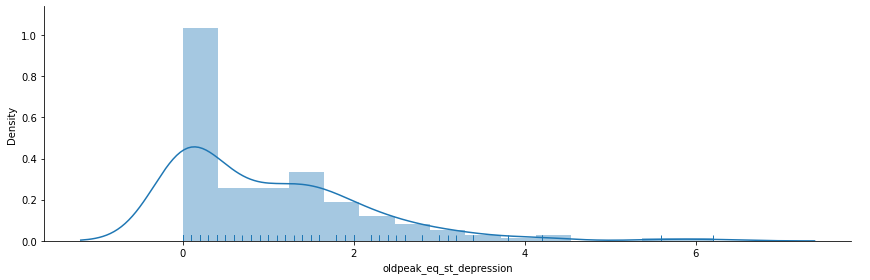

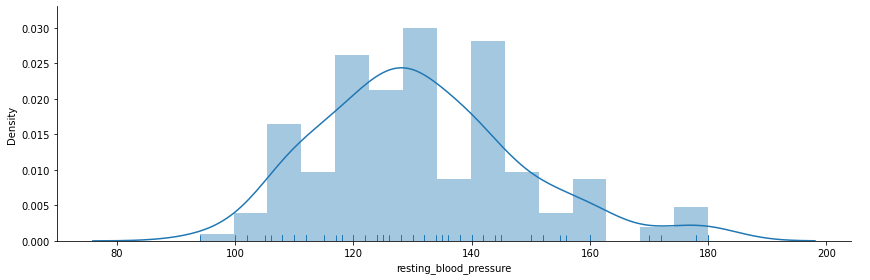

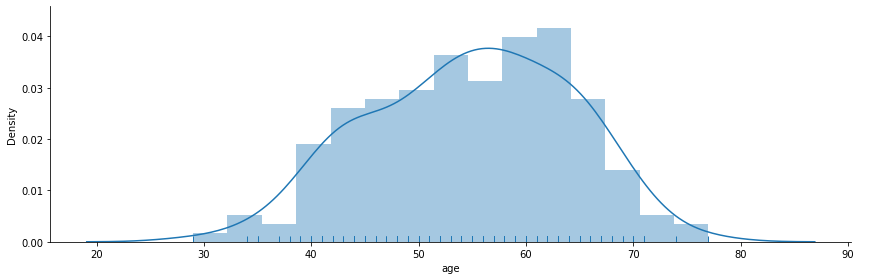

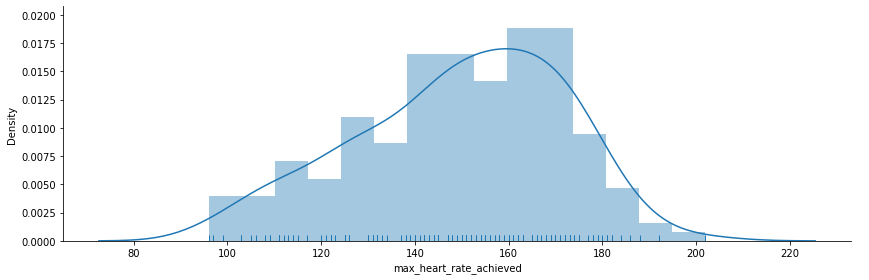

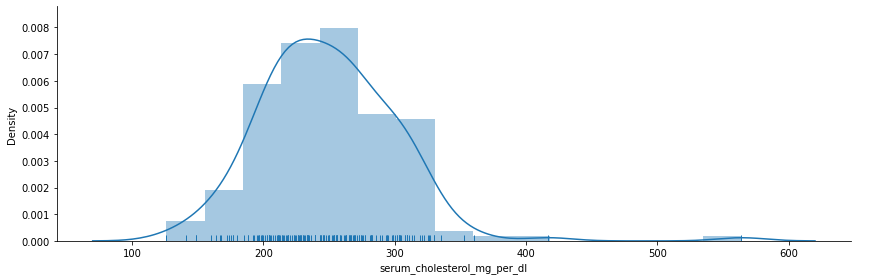

In [ ]:
for i,col in enumerate(num_col,1):
    sns.FacetGrid(df,height=4,aspect=3,palette='cool')\
    .map(sns.distplot,col,rug=True,bins=15)\
    .add_legend()
plt.show()

In [ ]:
for i,col in enumerate(num_col,1):
    print(col,'skewness :',round(X[col].skew(),2))

oldpeak_eq_st_depression skewness : 1.51
resting_blood_pressure skewness : 0.66
age skewness : -0.2
max_heart_rate_achieved skewness : -0.39
serum_cholesterol_mg_per_dl skewness : 1.27


*  We can see **skewness** is present only in `oldpeak_eq_st_depression`  and `serum_cholesterol_mg_per_dl skewness` 

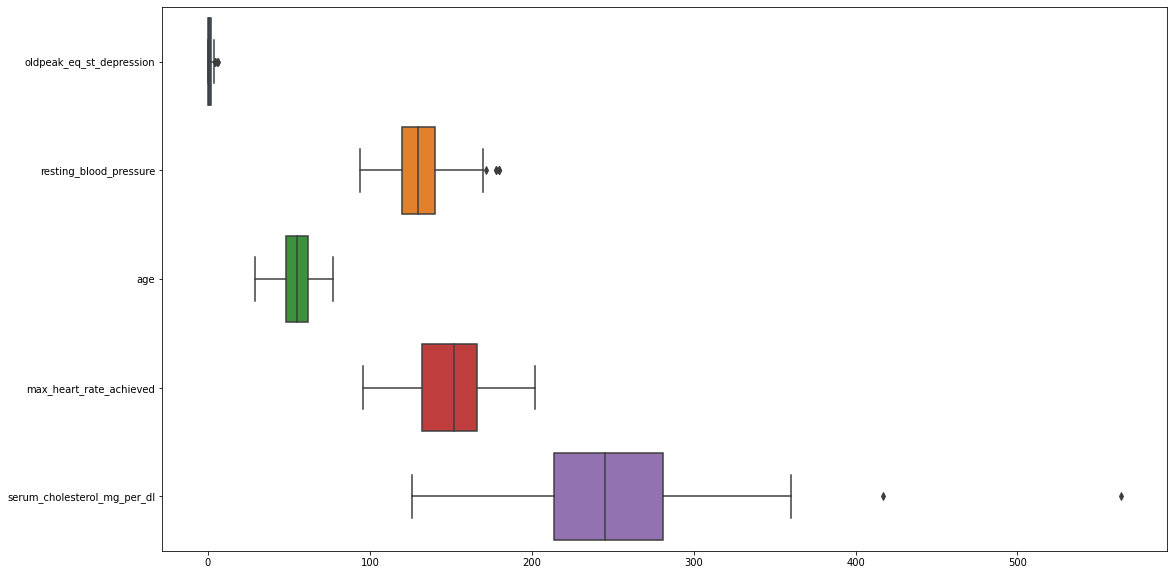

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=X[num_col],orient='h')


From above outlier detection ,

  *  oldpeak_eq_st_depression 
  *  resting_blood_pressure 
  *  serum_cholesterol_mg_per_dl has outliers


Numerical features are distributed in different ranges

CATEGORICAL COLUMNS :

OUTLIERS DETECTION :

Columns that contain string

In [ ]:
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

patient_id
thal


*  To covert categorical data(object type) to numerical data 
    
    *  covert string values to categorical values
    * categorical values to numerical values

### Coverting string datatype to categorical values :

In [ ]:
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    df[label] = content.astype("category").cat.as_ordered()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   patient_id                            180 non-null    category
 1   slope_of_peak_exercise_st_segment     180 non-null    int64   
 2   thal                                  180 non-null    category
 3   resting_blood_pressure                180 non-null    int64   
 4   chest_pain_type                       180 non-null    int64   
 5   num_major_vessels                     180 non-null    int64   
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64   
 7   resting_ekg_results                   180 non-null    int64   
 8   serum_cholesterol_mg_per_dl           180 non-null    int64   
 9   oldpeak_eq_st_depression              180 non-null    float64 
 10  sex                                   180 non-null    int64   
 11  age   

### Converting categorical values to integer datatype :

In [ ]:
for label, content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    df[label] = pd.Categorical(content).codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    int16  
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    int8   
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

### Coverting float values to categorical datatype :

In [ ]:
for label, content in df.items():
  if pd.api.types.is_float_dtype(content):
    df[label] = content.astype("category").cat.as_ordered()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   patient_id                            180 non-null    int16   
 1   slope_of_peak_exercise_st_segment     180 non-null    int64   
 2   thal                                  180 non-null    int8    
 3   resting_blood_pressure                180 non-null    int64   
 4   chest_pain_type                       180 non-null    int64   
 5   num_major_vessels                     180 non-null    int64   
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64   
 7   resting_ekg_results                   180 non-null    int64   
 8   serum_cholesterol_mg_per_dl           180 non-null    int64   
 9   oldpeak_eq_st_depression              180 non-null    category
 10  sex                                   180 non-null    int64   
 11  age   

### Converting categorical to interger datatype :

In [ ]:
for label, content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    df[label] = pd.Categorical(content).codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   patient_id                            180 non-null    int16
 1   slope_of_peak_exercise_st_segment     180 non-null    int64
 2   thal                                  180 non-null    int8 
 3   resting_blood_pressure                180 non-null    int64
 4   chest_pain_type                       180 non-null    int64
 5   num_major_vessels                     180 non-null    int64
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64
 7   resting_ekg_results                   180 non-null    int64
 8   serum_cholesterol_mg_per_dl           180 non-null    int64
 9   oldpeak_eq_st_depression              180 non-null    int8 
 10  sex                                   180 non-null    int64
 11  age                                   180 non

In [ ]:
X.isna().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

* Data is ready to fit in a model, as we converted everything to Numerical data.

* Lets check corelation by dropping patient_id column.

In [ ]:
df=df.drop('patient_id',axis=1)

In [ ]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,16,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,31,1,59,145,0,0


**MODELLING** 

*  Data modelling by splitting the training and testing data

In [ ]:
X=df.loc[:,["slope_of_peak_exercise_st_segment","thal","resting_blood_pressure","chest_pain_type","num_major_vessels","fasting_blood_sugar_gt_120_mg_per_dl","resting_ekg_results","serum_cholesterol_mg_per_dl","oldpeak_eq_st_depression",
"sex","age","max_heart_rate_achieved","exercise_induced_angina"]]

In [ ]:
X.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [ ]:
X.shape

(180, 14)

In [ ]:
Y=df.loc[:,["heart_disease_present"]]

In [ ]:
Y.head()

,heart_disease_present
0,0
1,0
2,1
3,1
4,0


In [ ]:
Y.shape

(180, 1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [ ]:
X_train.shape

(135, 13)

In [ ]:
Y_train.shape

(135, 1)

In [ ]:
X_test.shape

(45, 13)

In [ ]:
Y_test.shape

(45, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_lr = LinearRegression()

In [ ]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_predict = model_lr.predict(X_test)

In [ ]:
Y_test.head()

,heart_disease_present
116,0
112,1
99,0
161,1
35,0


In [ ]:
Y_predict

array([[ 0.16830292],
       [ 1.50510205],
       [-0.30969571],
       [ 0.775346  ],
       [ 0.20024065],
       [-0.0247256 ],
       [ 1.07593953],
       [-0.00487688],
       [ 0.98120626],
       [ 0.50374839],
       [ 0.52555742],
       [ 1.01191979],
       [ 0.32144612],
       [ 0.43003981],
       [ 0.77422778],
       [ 1.25125002],
       [ 0.54969637],
       [ 0.15987039],
       [ 0.30000742],
       [ 0.44219343],
       [ 0.18144232],
       [-0.1109752 ],
       [ 0.53365383],
       [ 0.43423057],
       [ 0.32180367],
       [ 0.46473964],
       [ 0.73567499],
       [ 1.10560407],
       [ 1.16323195],
       [ 0.92596131],
       [-0.0848728 ],
       [-0.05415778],
       [ 1.04985565],
       [ 0.56278109],
       [ 0.26266819],
       [ 0.56430909],
       [ 0.44031605],
       [ 0.21055285],
       [-0.02066168],
       [ 0.42419094],
       [ 0.31657044],
       [-0.05392738],
       [ 0.12825691],
       [ 1.03499899],
       [ 0.73043567]])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_test,Y_predict)

0.19430041958753108

Binary prediction classification using **logistic reggression :**
  
  *  heart_disease_present is binary dependent or target variable 
  *  Below we assigned **heart_disease_present.yn(yes/no)** as patient with dheart disease or not

In [ ]:
X= np.asarray(df["fasting_blood_sugar_gt_120_mg_per_dl",
"sex","exercise_induced_angina"])
Y=np.asarray(df["heart_disease_present"])
X= preprocessing.standardScaler().fit(X).transform(X)


KeyError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

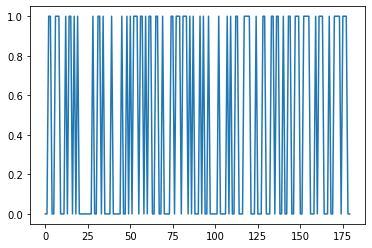

In [ ]:
heart_disease = df["heart_disease_present"].plot()
plt.show(heart_disease)

In [ ]:
Y = df.loc[:,["heart_disease_present"]]
X = df.loc[:,["fasting_blood_sugar_gt_120_mg_per_dl",
"sex","exercise_induced_angina"]]

NameError: ignored

In [ ]:
model_logr = LogisticRegression()

In [ ]:
X_train,X_test,y_train,Y_test =train_test_split (X,Y,test_size=0.3,random_state=4)

In [ ]:
X_train.shape

(126, 3)

In [ ]:
Y_train.shape

(135, 1)

In [ ]:
X_test.shape

(54, 3)

In [ ]:
Y_test.shape

(54, 1)

In [ ]:
Y_test.head()

NameError: ignored

In [ ]:
model_logr.fit(X_train,Y_train)

ValueError: ignored